Chapter 20

# 椭圆切线
Book_4《矩阵力量》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

这段代码生成一个特定参数化形式的封闭曲线并为其绘制多条切线，以展示曲线在不同点的切线性质。曲线的参数方程为：

$$
x = a \cos(b \sin(\theta)), \quad y = b \sin(b \sin(\theta))
$$

其中，参数 \( \theta \) 从 \( 0 \) 到 \( 2\pi \) 变化。代码通过设置 \( a = 1.5 \) 和 \( b = 1 \) 的值来控制曲线的形状，使得它呈现一种周期性波动的形态。

在绘制主曲线后，代码进一步在每个 \(\theta\) 对应的曲线点上计算该点的切线。每条切线满足方程：

$$
\frac{p_1 \cdot x}{a^2} + \frac{p_2 \cdot y}{b^2} - \frac{p_1^2}{a^2} - \frac{p_2^2}{b^2} = 0
$$

其中 \( (p_1, p_2) \) 是当前角度下的曲线坐标点。不同的切线方程通过颜色渐变显示，颜色由红到蓝渐变，以区分不同的角度。

代码最终设置图形的比例、坐标轴及网格线样式，使得该参数化曲线的切线特性在二维平面上更加直观清晰。通过这种方式，代码展示了该曲线在不同角度下的切线方向和位置，为理解曲线在平面上的局部几何性质提供了直观参考。

In [1]:
import numpy as np  # 导入 numpy 用于数值计算
import matplotlib.pyplot as plt  # 导入 matplotlib 用于绘图

## 定义椭圆参数

In [2]:
a = 1.5  # 定义椭圆的长轴
b = 1  # 定义椭圆的短轴

## 创建网格

In [3]:
x1 = np.linspace(-3, 3, 200)  # x 轴范围从 -3 到 3
x2 = np.linspace(-3, 3, 200)  # y 轴范围从 -3 到 3
xx1, xx2 = np.meshgrid(x1, x2)  # 创建 2D 网格，用于绘制等高线图

## 创建图形

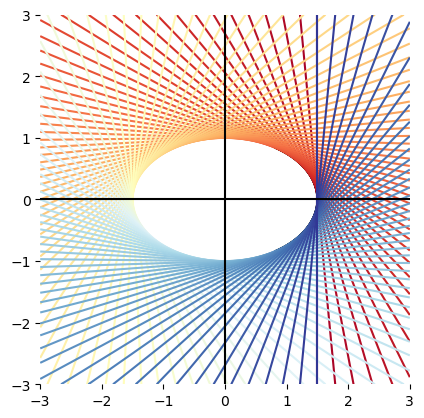

In [4]:
fig, ax = plt.subplots()

## 定义参数角度数组
theta_array = np.linspace(0, 2 * np.pi, 100)  # 从 0 到 2π 分成 100 个角度

## 绘制椭圆
plt.plot(a * np.cos(b * np.sin(theta_array)), b * np.sin(b * np.sin(theta_array)), color='k')  # 绘制椭圆曲线

## 设置颜色渐变
colors = plt.cm.RdYlBu(np.linspace(0, 1, len(theta_array)))  # 使用 RdYlBu 颜色映射，生成渐变色数组

## 绘制切线
for i in range(len(theta_array)):
    
    theta = theta_array[i]  # 获取当前角度
    
    p1 = a * np.cos(theta)  # 计算椭圆上的 x 坐标
    p2 = b * np.sin(theta)  # 计算椭圆上的 y 坐标
    
    tangent = p1 * xx1 / a**2 + p2 * xx2 / b**2 - p1**2 / a**2 - p2**2 / b**2  # 计算切线方程

    colors_i = colors[int(i), :]  # 获取当前切线的颜色
    
    ax.contour(xx1, xx2, tangent, levels=[0], colors=[colors_i])  # 绘制切线的等高线，颜色依次变化

## 设置图形显示属性
plt.axis('scaled')  # 保持坐标轴比例一致
ax.set_xlim(-3, 3)  # 设置 x 轴范围
ax.set_ylim(-3, 3)  # 设置 y 轴范围
ax.spines['top'].set_visible(False)  # 隐藏顶部边框
ax.spines['right'].set_visible(False)  # 隐藏右侧边框
ax.spines['bottom'].set_visible(False)  # 隐藏底部边框
ax.spines['left'].set_visible(False)  # 隐藏左侧边框
ax.axvline(x=0, color='k')  # 绘制 y 轴
ax.axhline(y=0, color='k')  # 绘制 x 轴